In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Metrics logic
def calculate_metrics(path, start):
    total_distance = sum(abs(path[i] - path[i - 1]) for i in range(1, len(path)))
    avg_seek_time = total_distance / len(path)
    return total_distance, avg_seek_time

In [3]:
#CLOOK Logic
def CLOOK(requests, start, end, initial_position):
    requests = sorted(requests)
    path = []
    
    if initial_position <= start:
        # Move upwards to handle all requests
        path = [initial_position] + requests
    elif initial_position >= end:
        # Handle all requests from the top
        path = [initial_position] + requests
    else:
        # Split requests into those above and below the initial position
        above = [r for r in requests if r >= initial_position]
        below = [r for r in requests if r < initial_position]
        # Move upwards, then jump to the lowest request and continue upwards
        path = [initial_position] + above + below
    
    total_distance, avg_seek_time = calculate_metrics(path, initial_position)
    return path, total_distance, avg_seek_time


In [4]:
#CSCAN Logic
def CSCAN(requests, start, end, initial_position):
    requests = sorted(requests)
    path = []
    if initial_position <= start:
        path = [start] + requests + [end, start]
    elif initial_position >= end:
        path = [end, start] + requests
    else:
        path = [r for r in requests if r >= initial_position] + [end, start] + [r for r in requests if r < initial_position]
    path = [initial_position] + path
    total_distance, avg_seek_time = calculate_metrics(path, initial_position)
    return path, total_distance, avg_seek_time

In [5]:
#FCFS logic
def FCFS(requests, initial_position):
    path = [initial_position] + requests
    total_distance, avg_seek_time = calculate_metrics(path, initial_position)
    return path, total_distance, avg_seek_time

In [6]:
#LOOK logic
def LOOK(requests, start, end, initial_position):
    requests = sorted(requests)
    path = []
    
    if initial_position <= start:
        # Move upwards to handle all requests
        path = [initial_position] + requests
    elif initial_position >= end:
        # Move downwards to handle all requests
        path = [initial_position] + list(reversed(requests))
    else:
        # Split requests into those above and below the initial position
        above = [r for r in requests if r >= initial_position]
        below = [r for r in requests if r < initial_position]
        # Move upwards first, then reverse and go downwards
        path = [initial_position] + above + list(reversed(below))
    
    total_distance, avg_seek_time = calculate_metrics(path, initial_position)
    return path, total_distance, avg_seek_time


In [7]:
#SCAN logic
def SCAN(requests, start, end, initial_position):
    requests = sorted(requests)
    path = []
    if initial_position <= start:
        path = [start] + requests
    elif initial_position >= end:
        path = requests + [end]
    else:
        path = [r for r in requests if r >= initial_position] + [end] + [r for r in reversed(requests) if r < initial_position]
    path = [initial_position] + path
    total_distance, avg_seek_time = calculate_metrics(path, initial_position)
    return path, total_distance, avg_seek_time

In [8]:
#SSTF logic
def SSTF(requests, initial_position):
    path = [initial_position]
    while requests:
        closest_request = min(requests, key=lambda x: abs(x - path[-1]))
        path.append(closest_request)
        requests.remove(closest_request)
    total_distance, avg_seek_time = calculate_metrics(path, initial_position)
    return path, total_distance, avg_seek_time

In [9]:
#Samples
initial_position = 5
requests = [1, 9, 4, 7, 3, 6]    #Sample requests
start = 0
end = 10

In [10]:
#Driver Code
path_1, total_distance_1, avg_seek_time_1 = FCFS(requests=requests, initial_position=initial_position)
path_2, total_distance_2, avg_seek_time_2 = SSTF(requests=requests, initial_position=initial_position)
path_3, total_distance_3, avg_seek_time_3 = SCAN(requests=requests, initial_position=initial_position, start=start, end = end)
path_4, total_distance_4, avg_seek_time_4 = LOOK(requests=requests, initial_position=initial_position, start=start, end = end)
path_5, total_distance_5, avg_seek_time_5 = CSCAN(requests=requests, initial_position=initial_position, start=start, end = end)
path_6, total_distance_6, avg_seek_time_6 = CLOOK(requests=requests, initial_position=initial_position, start=start, end = end)

In [11]:
path = [path_1, path_2, path_3, path_4, path_5, path_6]
total_distance = [total_distance_1, total_distance_2, total_distance_3, total_distance_4, total_distance_5, total_distance_6]
avg_seek_time = [avg_seek_time_1, avg_seek_time_2, avg_seek_time_3, avg_seek_time_4, avg_seek_time_5, avg_seek_time_6]
algos = ["FCFS", "SSTF", "SCAN", "LOOK", "CSCAN", "CLOOK"]

C:\Users\devro\AppData\Local\Temp\ipykernel_12460\3980358584.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algorithm', y='Total Distance', data=data, ax=axes[0], palette='Blues_d')
C:\Users\devro\AppData\Local\Temp\ipykernel_12460\3980358584.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algorithm', y='Average Seek Time', data=data, ax=axes[1], palette='Reds_d')


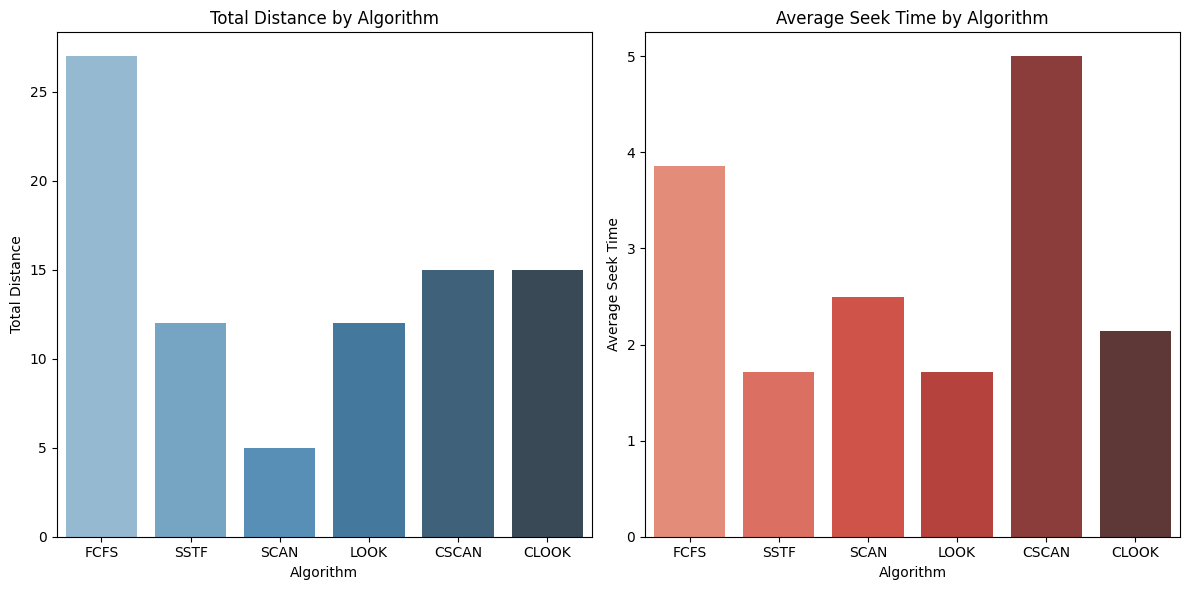

In [17]:
# Create a DataFrame for easier plotting with Seaborn
data = pd.DataFrame({
    'Algorithm': algos,
    'Total Distance': total_distance,
    'Average Seek Time': avg_seek_time
})

# Set up the figure and the axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Total Distance plot
sns.barplot(x='Algorithm', y='Total Distance', data=data, ax=axes[0], palette='Blues_d')
axes[0].set_title('Total Distance by Algorithm')

# Average Seek Time plot
sns.barplot(x='Algorithm', y='Average Seek Time', data=data, ax=axes[1], palette='Reds_d')
axes[1].set_title('Average Seek Time by Algorithm')

# Adjust the layout
plt.tight_layout()
plt.show()

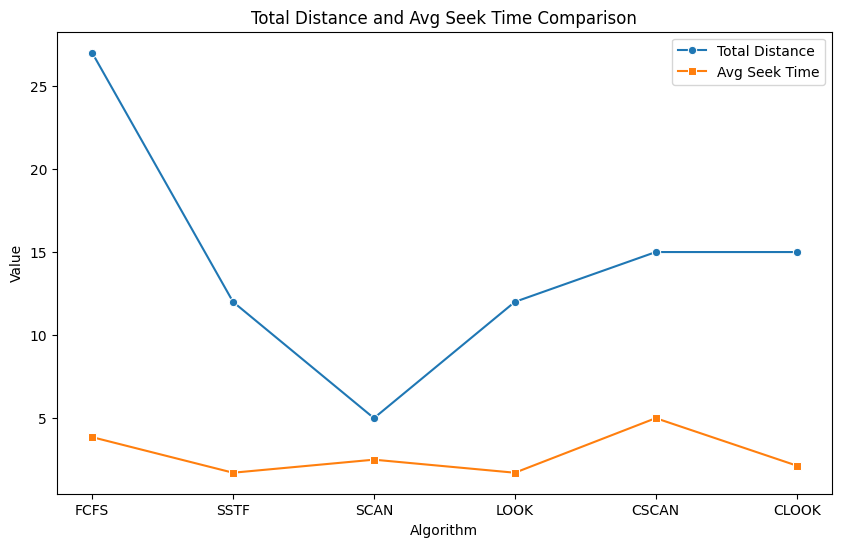

In [18]:
# Create a combined DataFrame
df_combined = pd.DataFrame({
    'Algorithm': algos,
    'Total Distance': total_distance,
    'Avg Seek Time': avg_seek_time
})

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Algorithm', y='Total Distance', data=df_combined, marker='o', label='Total Distance')
sns.lineplot(x='Algorithm', y='Avg Seek Time', data=df_combined, marker='s', label='Avg Seek Time')

plt.title('Total Distance and Avg Seek Time Comparison')
plt.ylabel('Value')
plt.xlabel('Algorithm')
plt.legend()
plt.show()


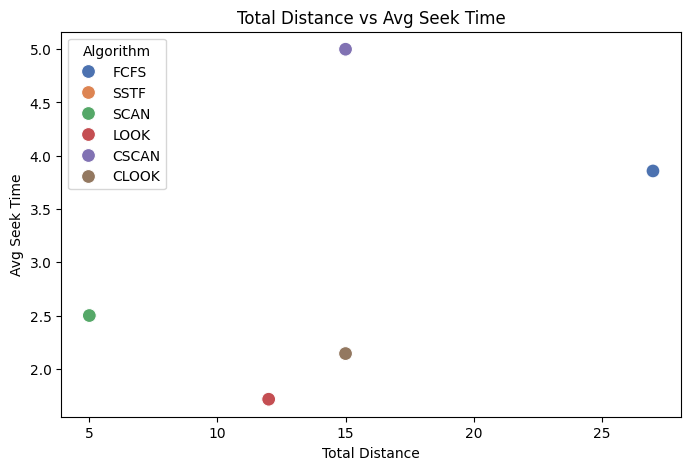

In [19]:
# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Total Distance', y='Avg Seek Time', data=df_combined, hue='Algorithm', palette='deep', s=100)

plt.title('Total Distance vs Avg Seek Time')
plt.ylabel('Avg Seek Time')
plt.xlabel('Total Distance')
plt.legend(title='Algorithm')
plt.show()


d:\Elevate\venv\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
d:\Elevate\venv\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
d:\Elevate\venv\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
d:\Elevate\venv\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_ar

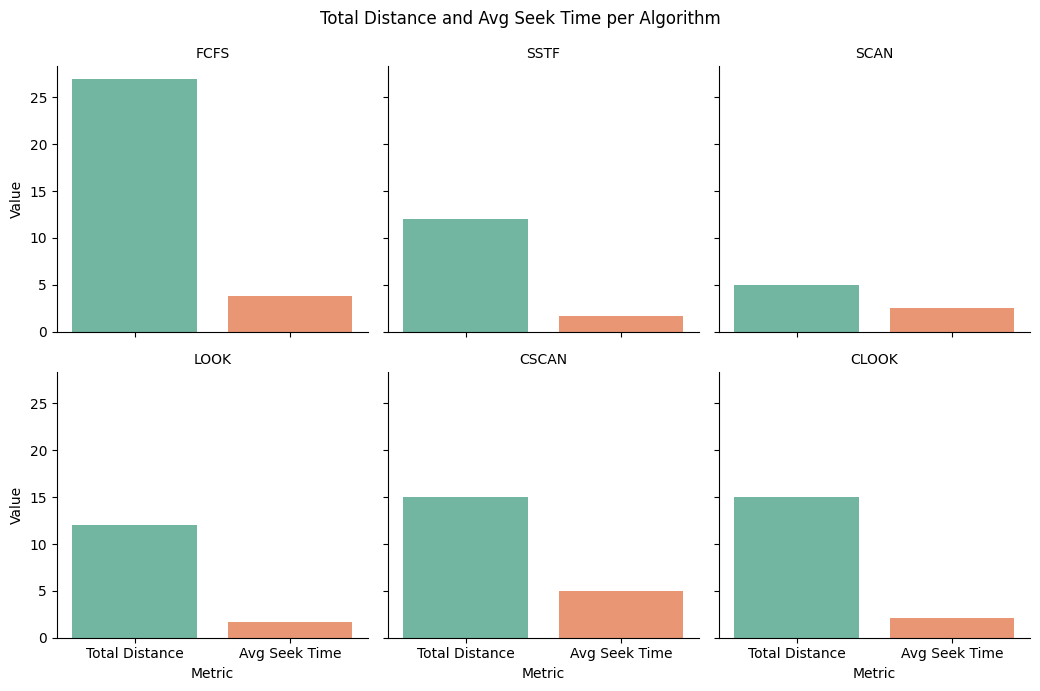

In [20]:
# Melt data for facet grid plotting
df_melted = pd.melt(df_combined, id_vars='Algorithm', var_name='Metric', value_name='Value')

# FacetGrid
g = sns.FacetGrid(df_melted, col='Algorithm', col_wrap=3, height=3.5)
g.map(sns.barplot, 'Metric', 'Value', palette='Set2')
g.set_titles('{col_name}')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Total Distance and Avg Seek Time per Algorithm')
plt.show()

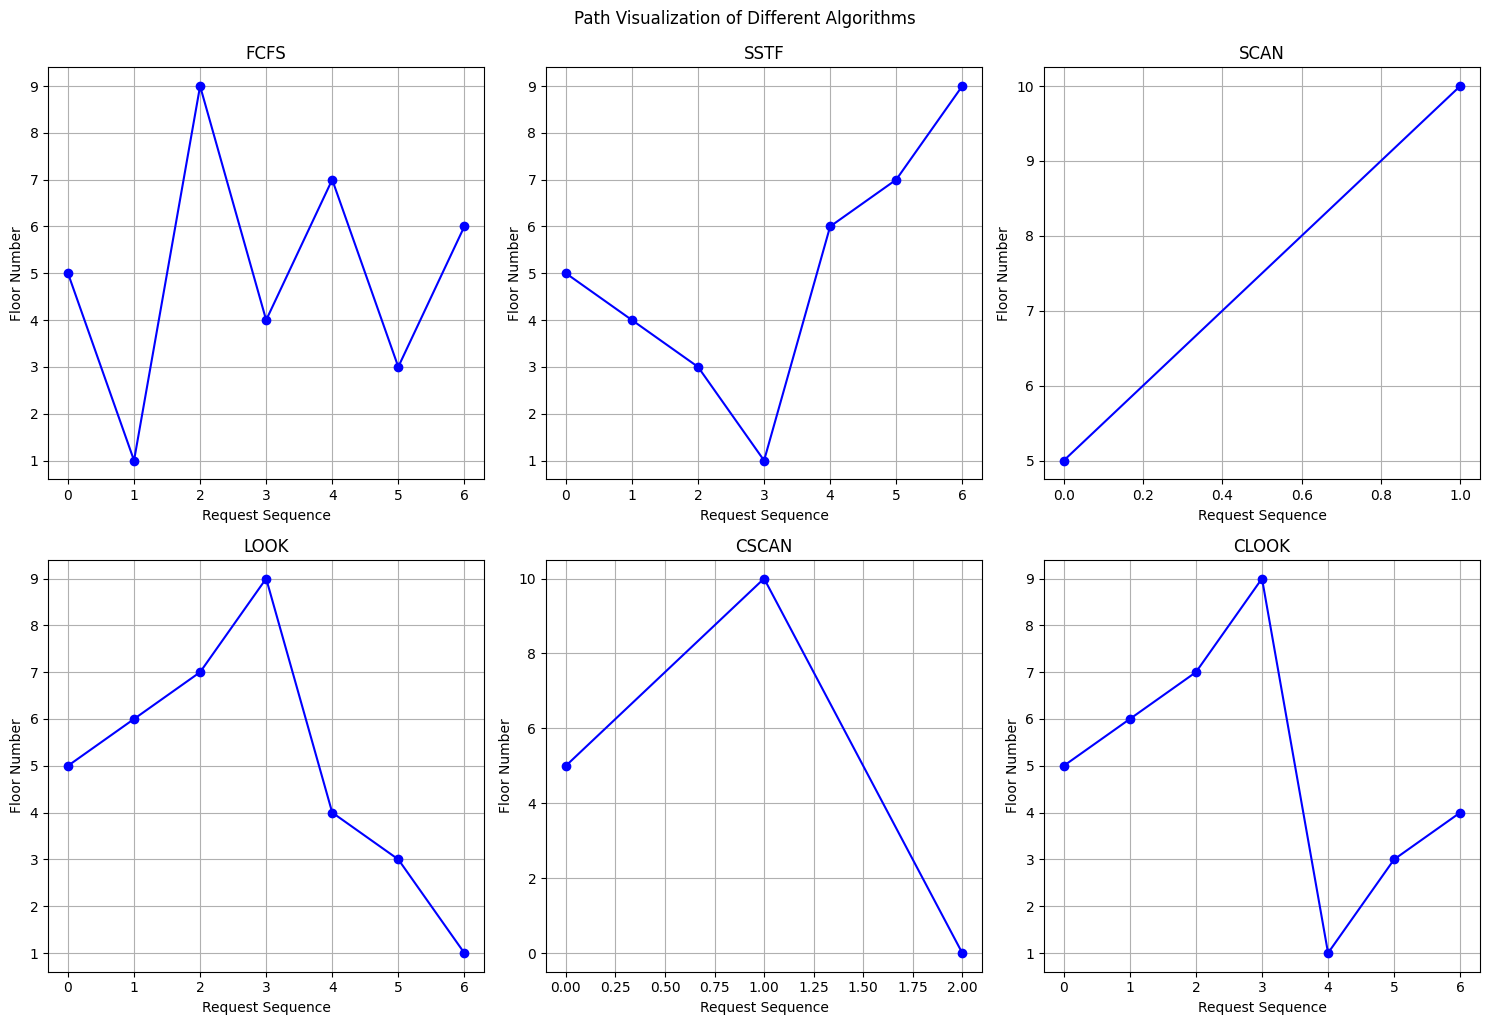

In [21]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot the path for each algorithm
for i, algo in enumerate(algos):
    axes[i].plot(path[i], marker='o', linestyle='-', color='b')
    axes[i].set_title(algo)
    axes[i].set_xlabel('Request Sequence')
    axes[i].set_ylabel('Floor Number')
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.suptitle('Path Visualization of Different Algorithms', y=1.02)
plt.show()